In [1]:
#importing the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Generating my dataset

x = np.linspace(0,50,501)
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [3]:
y = np.sin(x)

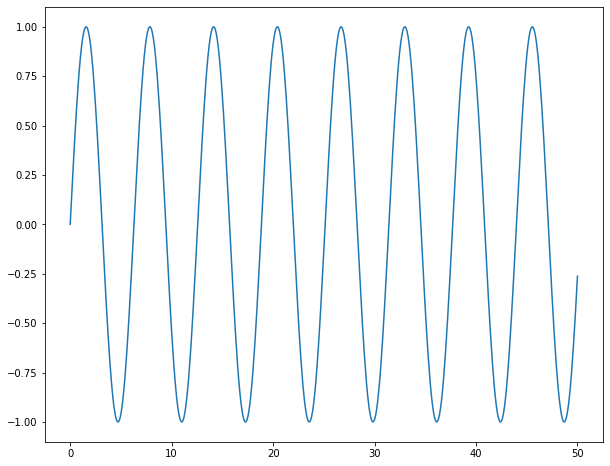

In [4]:
#plotting my data
plt.subplots(figsize = (10,8))
plt.plot(x,y)
plt.show()

In [5]:
df = pd.DataFrame(data = y, index = x, columns = ["Sine"])

In [6]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [7]:
frac = 0.1
count_test_pts = frac*len(df)
print(count_test_pts)


50.1


In [8]:
cut_off_pt = int(len(df) - count_test_pts)
print(cut_off_pt)

450


In [9]:
train = df.iloc[:cut_off_pt]
test = df.iloc[cut_off_pt:]

In [10]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.5,0.494885
44.6,0.579164
44.7,0.657656
44.8,0.729577


In [11]:
test

,Sine
45.0,0.850904
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429


In [15]:
#in RNN since we feed the output back to neurons we also need to scale the data

In [12]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
scaler_train = scaler.transform(train)
scaler_test = scaler.transform(test)

# Model 1

##### Creating batches for training

In [19]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
length = 50                    #Get 2 data points and length sould be enough to pick trends/seasonality
batch_size = 1                #Predict the next one

#i.e. something of the order: (datapt1, datapt2) =====> datapt3        (length =2, batch = 1)

#note: here my data and target are both same
generator = TimeseriesGenerator(scaler_train, scaler_train, length= length, batch_size= batch_size)


In [24]:
print("Length of generator is:", len(generator))
print("Length of X_train is: ", len(scaler_train))

Length of generator is: 400
Length of X_train is:  450


In [25]:
generator[0]

(array([[[4.99999116e-01],
         [5.49916225e-01],
         [5.99334579e-01],
         [6.47760405e-01],
         [6.94709850e-01],
         [7.39713809e-01],
         [7.82322618e-01],
         [8.22110545e-01],
         [8.58680040e-01],
         [8.91665714e-01],
         [9.20737985e-01],
         [9.45606372e-01],
         [9.66022399e-01],
         [9.81782075e-01],
         [9.92727935e-01],
         [9.98750612e-01],
         [9.99789928e-01],
         [9.95835500e-01],
         [9.86926839e-01],
         [9.73152957e-01],
         [9.54651478e-01],
         [9.31607263e-01],
         [9.04250562e-01],
         [8.72854714e-01],
         [8.37733417e-01],
         [7.99237589e-01],
         [7.57751870e-01],
         [7.13690771e-01],
         [6.67494535e-01],
         [6.19624741e-01],
         [5.70559686e-01],
         [5.20789614e-01],
         [4.70811810e-01],
         [4.21125636e-01],
         [3.72227539e-01],
         [3.24606094e-01],
         [2.78737119e-01],
 

### Building the model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN

In [28]:
n_features = 1        #Only one feature input i.e. x

In [29]:
model = Sequential()
model.add(SimpleRNN(units = 50, input_shape = (length, n_features)))   #Input_shape = (length of sequence x, no. of features used)
model.add(Dense(units = 1))      #output_layer

model.compile(optimizer = "adam", loss = "mse")

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit_generator(generator, epochs = 5)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
400/400 [==============================] - 16s 34ms/step - loss: 0.0310
Epoch 2/5
400/400 [==============================] - 13s 33ms/step - loss: 2.4006e-04
Epoch 3/5
400/400 [==============================] - 13s 34ms/step - loss: 1.4356e-04
Epoch 4/5
400/400 [==============================] - 14s 34ms/step - loss: 0.0011
Epoch 5/5
400/400 [==============================] - 14s 35ms/step - loss: 1.9819e-04


In [36]:
losses = pd.DataFrame(model.history.history, index=[1,2,3,4,5])

In [37]:
losses

,loss
1,0.006597
2,0.000198
3,0.000197
4,0.000517
5,0.000131


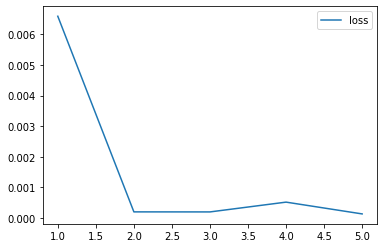

In [38]:
losses.plot()

### Predicting 1 outcome

In [40]:
first_eval_batch = scaler_train[-length:]          #To predict 1st test set value, we need to give length sized array from train
print(first_eval_batch.shape)

(50, 1)


In [41]:
first_eval_batch = first_eval_batch.reshape(1, length, n_features)   #Model expect data in batches so reshape 
print(first_eval_batch.shape)

(1, 50, 1)


In [44]:
first_eval_batch

array([[[8.72558686e-01],
        [8.37405820e-01],
        [7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.0

In [42]:
model.predict(first_eval_batch)          #Output is 2D array while input is 3D array

array([[0.92514116]], dtype=float32)

### Getting test predictions

In [103]:
test_pred = []
first_eval_array = scaler_train[-length:].reshape(1,length,n_features)   #reshpae : (1,50,1)
curr_array = first_eval_array.copy()

for i in range(len(scaler_test)):
  
  model_predict = model.predict(curr_array)               #output in format [[value]]
  test_pred.append(model_predict.item())        #appending the data to my test_pred

  curr_array = np.append(curr_array[:,1:,:], model_predict.reshape(1,1,1), axis = 1)    #axis (axis_no 0,axis_no 1,axis_no 2)


In [119]:
data_df = pd.DataFrame({"Actual_Scaled": scaler_test.reshape(-1),
                        "Predicted_Scaled": test_pred})

In [120]:
data_df

,Actual_Scaled,Predicted_Scaled
0,0.925454,0.925141
1,0.949551,0.947636
2,0.969157,0.965828
3,0.984074,0.978877
4,0.994155,0.986643
5,0.999299,0.989423
6,0.999453,0.987340
7,0.994617,0.980253
8,0.984840,0.968394
9,0.970217,0.952234


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


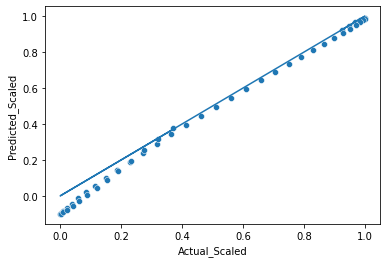

In [123]:
import seaborn as sns
sns.scatterplot(data_df["Actual_Scaled"],data_df["Predicted_Scaled"])
plt.plot(data_df["Actual_Scaled"],data_df["Actual_Scaled"])
plt.show()

### Reverse back the scaling

In [130]:
test_predicted = scaler.inverse_transform(np.array(test_pred).reshape(-1,1))
test_predicted

array([[ 0.85027726],
       [ 0.89526684],
       [ 0.93165125],
       [ 0.9577475 ],
       [ 0.97328035],
       [ 0.97884034],
       [ 0.97467354],
       [ 0.9605005 ],
       [ 0.93678305],
       [ 0.90446328],
       [ 0.86333474],
       [ 0.81401194],
       [ 0.75716863],
       [ 0.69329001],
       [ 0.62280928],
       [ 0.54620219],
       [ 0.46423657],
       [ 0.37766819],
       [ 0.28642589],
       [ 0.19144594],
       [ 0.09358079],
       [-0.00691482],
       [-0.10951844],
       [-0.21306346],
       [-0.31665425],
       [-0.41986047],
       [-0.52135549],
       [-0.61966597],
       [-0.71419145],
       [-0.80366228],
       [-0.88667026],
       [-0.96189105],
       [-1.02876658],
       [-1.08611641],
       [-1.13251174],
       [-1.16769703],
       [-1.19115111],
       [-1.20189138],
       [-1.19941025],
       [-1.18416124],
       [-1.15577976],
       [-1.11368997],
       [-1.05889834],
       [-0.99196652],
       [-0.91275034],
       [-0

In [138]:
#Adding data to my original dataframe
test["sine_predicted"] = test_predicted
test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sine,sine_predicted
45.0,0.850904,0.850277
45.1,0.899097,0.895267
45.2,0.938307,0.931651
45.3,0.968142,0.957748
45.4,0.988304,0.973280
45.5,0.998591,0.978840
45.6,0.998900,0.974674
45.7,0.989229,0.960500
45.8,0.969673,0.936783
45.9,0.940429,0.904463


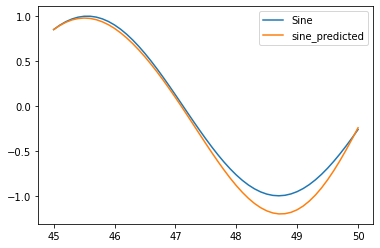

In [139]:
test.plot()

In [140]:
#Note: As we use more and more of the predicted values to predict the next values, we have startedd to deviate form the actual curve

# Model 2

#### Generate the dataset 

In [14]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [16]:
#Train set generator 

length = 45                    #length sould be enough to pick trends/seasonality
batch_size = 1                 #output 

#generator will generate datasets: [length] =>[batch_size]
#i.e. something of the order: (datapt1, datapt2) =====> datapt3        (length =2, batch = 1)

#note: here my data and target are both same
train_generator = TimeseriesGenerator(scaler_train, scaler_train, length= length, batch_size= batch_size)

In [17]:
print("length of train generator: ", len(train_generator))

#len(train_geneartor) = len(scaler_train) - length

length of train generator:  405


In [21]:
train_generator[0]

(array([[[0.49999912],
         [0.54991622],
         [0.59933458],
         [0.64776041],
         [0.69470985],
         [0.73971381],
         [0.78232262],
         [0.82211054],
         [0.85868004],
         [0.89166571],
         [0.92073798],
         [0.94560637],
         [0.9660224 ],
         [0.98178208],
         [0.99272794],
         [0.99875061],
         [0.99978993],
         [0.9958355 ],
         [0.98692684],
         [0.97315296],
         [0.95465148],
         [0.93160726],
         [0.90425056],
         [0.87285471],
         [0.83773342],
         [0.79923759],
         [0.75775187],
         [0.71369077],
         [0.66749454],
         [0.61962474],
         [0.57055969],
         [0.52078961],
         [0.47081181],
         [0.42112564],
         [0.37222754],
         [0.32460609],
         [0.27873712],
         [0.23507892],
         [0.19406772],
         [0.15611328],
         [0.12159483],
         [0.09085728],
         [0.06420773],
         [0

In [22]:
#Test set generator 

test_generator = TimeseriesGenerator(scaler_test, scaler_test, length = length, batch_size = batch_size)

In [23]:
print("length of test generator: ", len(test_generator))

length of test generator:  6


### Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN

In [25]:
n_features = 1

In [26]:
model = Sequential()
model.add(LSTM(units = 45, input_shape = (length, n_features)))   #Input_shape = (length of sequence x, no. of features used)
model.add(Dense(units = 1))      #output_layer

model.compile(optimizer = "adam", loss = "mse")

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 45)                8460      
_________________________________________________________________
dense (Dense)                (None, 1)                 46        
Total params: 8,506
Trainable params: 8,506
Non-trainable params: 0
_________________________________________________________________


In [28]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopper = EarlyStopping(monitor = "val_loss", patience = 3)

In [31]:
model_history = model.fit_generator(train_generator, epochs = 20,validation_data= test_generator,
                    callbacks = [early_stopper])

Epoch 1/20
 28/405 [=>............................] - ETA: 1s - loss: 8.9128e-05

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


405/405 [==============================] - 2s 4ms/step - loss: 4.1865e-04 - val_loss: 1.9478e-05
Epoch 2/20
405/405 [==============================] - 2s 4ms/step - loss: 7.9745e-05 - val_loss: 2.2711e-06
Epoch 3/20
405/405 [==============================] - 2s 4ms/step - loss: 9.9019e-05 - val_loss: 1.6206e-05
Epoch 4/20
405/405 [==============================] - 2s 4ms/step - loss: 1.4668e-04 - val_loss: 2.0206e-06
Epoch 5/20
405/405 [==============================] - 2s 4ms/step - loss: 8.4714e-05 - val_loss: 7.6586e-06
Epoch 6/20
405/405 [==============================] - 2s 4ms/step - loss: 2.4986e-04 - val_loss: 1.6665e-05
Epoch 7/20
405/405 [==============================] - 2s 4ms/step - loss: 5.5137e-05 - val_loss: 4.7522e-05


In [34]:
model_history_df = pd.DataFrame(model_history.history, index = [1,2,3,4,5,6,7])
model_history_df

,loss,val_loss
1,0.000419,0.000019
2,0.000080,0.000002
3,0.000099,0.000016
4,0.000147,0.000002
5,0.000085,0.000008
6,0.000250,0.000017
7,0.000055,0.000048


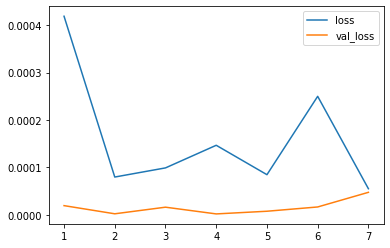

In [35]:
model_history_df.plot()

In [38]:
first_eval_batch = scaler_train[-length:].reshape(1,length,n_features)
model.predict(first_eval_batch)

array([[0.939156]], dtype=float32)

In [40]:
first_eval_batch.shape

(1, 45, 1)

In [41]:
#Getting the entire dataset

test_pred_LSTM = []
first_eval_batch = scaler_train[-length:].reshape(1,length,n_features)
curr_batch_LSTM = first_eval_batch.copy()

for i in range(len(scaler_test)):
  outcome = model.predict(curr_batch_LSTM)
  test_pred_LSTM.append(outcome.item())            #appended the outcome to the list
  curr_batch_LSTM = np.append(curr_batch_LSTM[:,1:,:], outcome.reshape(1,1,1), axis =1 )



In [44]:
comparision_df_scaled = pd.DataFrame({"Actual_Scaled": scaler_test.squeeze(), 
                                      "Predicted_Scaled": test_pred_LSTM
                                      })

In [45]:
comparision_df_scaled

,Actual_Scaled,Predicted_Scaled
0,0.925454,0.939156
1,0.949551,0.964691
2,0.969157,0.986132
3,0.984074,1.003184
4,0.994155,1.015598
5,0.999299,1.023221
6,0.999453,1.025981
7,0.994617,1.023874
8,0.984840,1.016948
9,0.970217,1.005302


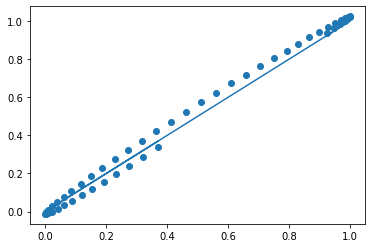

In [47]:
#Plotting thes results
plt.scatter(comparision_df_scaled["Actual_Scaled"], comparision_df_scaled["Predicted_Scaled"])
plt.plot(comparision_df_scaled["Actual_Scaled"], comparision_df_scaled["Actual_Scaled"])

In [49]:
predicted_resclaed = scaler.inverse_transform(np.array(test_pred_LSTM).reshape(-1,1))

In [51]:
test["predicted_sine"] = predicted_resclaed

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
test

,Sine,predicted_sine
45.0,0.850904,0.878307
45.1,0.899097,0.929377
45.2,0.938307,0.972258
45.3,0.968142,1.006362
45.4,0.988304,1.031189
45.5,0.998591,1.046436
45.6,0.998900,1.051956
45.7,0.989229,1.047740
45.8,0.969673,1.033890
45.9,0.940429,1.010597


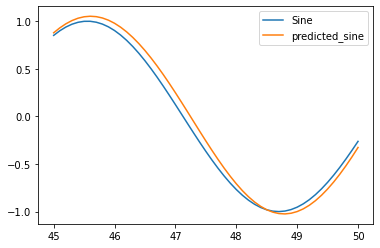

In [53]:
test.plot()

# Final Model

### Preprocessing

In [56]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [66]:
y

array([[ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,
         2.95520207e-01,  3.89418342e-01,  4.79425539e-01,
         5.64642473e-01,  6.44217687e-01,  7.17356091e-01,
         7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
         9.32039086e-01,  9.63558185e-01,  9.85449730e-01,
         9.97494987e-01,  9.99573603e-01,  9.91664810e-01,
         9.73847631e-01,  9.46300088e-01,  9.09297427e-01,
         8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
         6.75463181e-01,  5.98472144e-01,  5.15501372e-01,
         4.27379880e-01,  3.34988150e-01,  2.39249329e-01,
         1.41120008e-01,  4.15806624e-02, -5.83741434e-02,
        -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
        -4.42520443e-01, -5.29836141e-01, -6.11857891e-01,
        -6.87766159e-01, -7.56802495e-01, -8.18277111e-01,
        -8.71575772e-01, -9.16165937e-01, -9.51602074e-01,
        -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
        -9.96164609e-01, -9.82452613e-01, -9.58924275e-0

In [68]:
#first scaling the data for LSTM/RNN

y = y.reshape(-1,1)     #Always scale the MinMax column wise

from sklearn.preprocessing import MinMaxScaler
data_scaler = MinMaxScaler()
data_scaler.fit(y)
y_scaled = data_scaler.transform(y)

In [69]:
y_scaled

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


In [70]:
#Now we have scaled the data lets use generator to adhere to teh format

length = 49
batch_size = 1


generator_data = TimeseriesGenerator(y_scaled, y_scaled, length = length, batch_size=batch_size)

In [71]:
len(generator_data)

452

In [72]:
generator_data[0]

(array([[[4.99999116e-01],
         [5.49916225e-01],
         [5.99334579e-01],
         [6.47760405e-01],
         [6.94709850e-01],
         [7.39713809e-01],
         [7.82322618e-01],
         [8.22110545e-01],
         [8.58680040e-01],
         [8.91665714e-01],
         [9.20737985e-01],
         [9.45606372e-01],
         [9.66022399e-01],
         [9.81782075e-01],
         [9.92727935e-01],
         [9.98750612e-01],
         [9.99789928e-01],
         [9.95835500e-01],
         [9.86926839e-01],
         [9.73152957e-01],
         [9.54651478e-01],
         [9.31607263e-01],
         [9.04250562e-01],
         [8.72854714e-01],
         [8.37733417e-01],
         [7.99237589e-01],
         [7.57751870e-01],
         [7.13690771e-01],
         [6.67494535e-01],
         [6.19624741e-01],
         [5.70559686e-01],
         [5.20789614e-01],
         [4.70811810e-01],
         [4.21125636e-01],
         [3.72227539e-01],
         [3.24606094e-01],
         [2.78737119e-01],
 

### Model Building

In [73]:
#build the model
n_features =1

model = Sequential()
model.add(LSTM(units = 49, input_shape = (length, n_features)))   #Input_shape = (length of sequence x, no. of features used)
model.add(Dense(units = 1))      #output_layer

model.compile(optimizer = "adam", loss = "mse")

In [74]:
early_stop = EarlyStopping(monitor = "loss" , patience= 5)

In [75]:
model_history = model.fit_generator(generator_data, epochs = 25,
                    callbacks = [early_stop])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
452/452 [==============================] - 3s 4ms/step - loss: 0.0439
Epoch 2/25
452/452 [==============================] - 2s 4ms/step - loss: 1.6144e-04
Epoch 3/25
452/452 [==============================] - 2s 4ms/step - loss: 1.4675e-04
Epoch 4/25
452/452 [==============================] - 2s 4ms/step - loss: 7.7098e-04
Epoch 5/25
452/452 [==============================] - 2s 4ms/step - loss: 6.6964e-05
Epoch 6/25
452/452 [==============================] - 2s 4ms/step - loss: 7.9531e-05
Epoch 7/25
452/452 [==============================] - 2s 4ms/step - loss: 5.4402e-05
Epoch 8/25
452/452 [==============================] - 2s 4ms/step - loss: 1.0247e-04
Epoch 9/25
452/452 [==============================] - 2s 4ms/step - loss: 3.4809e-04
Epoch 10/25
452/452 [==============================] - 2s 4ms/step - loss: 4.3528e-05
Epoch 11/25
452/452 [==============================] - 2s 4ms/step - loss: 1.2349e-04
Epoch 12/25
452/452 [==============================] - 2s 4ms/step 

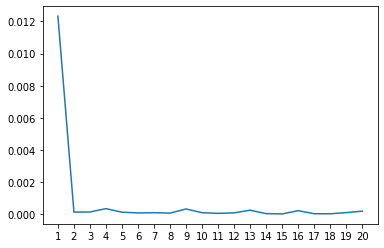

In [80]:
data_df = pd.DataFrame(model_history.history, index = np.arange(1,21,1))
plt.xticks(np.arange(1,21,1))
plt.plot(data_df["loss"])

In [82]:
true_data = pd.DataFrame(y, index = x)
true_data

,0
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [83]:
### Forecasting

In [99]:
first_batch = y_scaled[-length:].reshape(1, length,batch_size)


def forecasting(initial_data_array,n):
  
  assert initial_data_array.shape == (1,length,1), "Shape mismatch error"
  
  forecast_list = []
  curr_data =  initial_data_array.copy()

  for i in range(n):
    output = model.predict(curr_data)
    forecast_list.append(output.item())          #adding to my list
    curr_data = np.append(curr_data[:,1:,:], output.reshape(1,1,1), 1)


  return forecast_list


### Forecasting

In [109]:
#forecasting

In [100]:
forecast = forecasting(first_batch, 25)

In [114]:
forecast

[0.4162837862968445,
 0.4657120108604431,
 0.5154246091842651,
 0.5649133920669556,
 0.6136704087257385,
 0.6611935496330261,
 0.7069926261901855,
 0.7505960464477539,
 0.7915566563606262,
 0.8294577598571777,
 0.8639194369316101,
 0.8946025967597961,
 0.9212144017219543,
 0.9435114860534668,
 0.9613019227981567,
 0.9744473695755005,
 0.9828616380691528,
 0.9865111112594604,
 0.9854109287261963,
 0.979623019695282,
 0.9692515134811401,
 0.954440176486969,
 0.9353681802749634,
 0.9122469425201416,
 0.8853175044059753]

### Comparision

In [105]:
forecast_index = np.arange(50.1,52.6 , 0.1)

In [106]:
forecast_index

array([50.1, 50.2, 50.3, 50.4, 50.5, 50.6, 50.7, 50.8, 50.9, 51. , 51.1,
       51.2, 51.3, 51.4, 51.5, 51.6, 51.7, 51.8, 51.9, 52. , 52.1, 52.2,
       52.3, 52.4, 52.5])

In [116]:
forecast_rescaled = scaler.inverse_transform(np.array(forecast).reshape(-1,1))
forecast_rescaled

array([[-0.16742932],
       [-0.06857366],
       [ 0.03085074],
       [ 0.12982751],
       [ 0.22734076],
       [ 0.32238628],
       [ 0.4139837 ],
       [ 0.50118984],
       [ 0.5831104 ],
       [ 0.658912  ],
       [ 0.7278348 ],
       [ 0.78920063],
       [ 0.84242381],
       [ 0.88701762],
       [ 0.92259821],
       [ 0.94888889],
       [ 0.96571729],
       [ 0.97301618],
       [ 0.97081583],
       [ 0.95924011],
       [ 0.93849726],
       [ 0.90887483],
       [ 0.87073114],
       [ 0.82448904],
       [ 0.77063059]])

In [121]:
forecast_rescaled.shape

(25, 1)

In [123]:
actual_plus_forecast = np.append(y.reshape(501,1),forecast_rescaled, axis = 0)
actual_plus_forecast

array([[ 0.00000000e+00],
       [ 9.98334166e-02],
       [ 1.98669331e-01],
       [ 2.95520207e-01],
       [ 3.89418342e-01],
       [ 4.79425539e-01],
       [ 5.64642473e-01],
       [ 6.44217687e-01],
       [ 7.17356091e-01],
       [ 7.83326910e-01],
       [ 8.41470985e-01],
       [ 8.91207360e-01],
       [ 9.32039086e-01],
       [ 9.63558185e-01],
       [ 9.85449730e-01],
       [ 9.97494987e-01],
       [ 9.99573603e-01],
       [ 9.91664810e-01],
       [ 9.73847631e-01],
       [ 9.46300088e-01],
       [ 9.09297427e-01],
       [ 8.63209367e-01],
       [ 8.08496404e-01],
       [ 7.45705212e-01],
       [ 6.75463181e-01],
       [ 5.98472144e-01],
       [ 5.15501372e-01],
       [ 4.27379880e-01],
       [ 3.34988150e-01],
       [ 2.39249329e-01],
       [ 1.41120008e-01],
       [ 4.15806624e-02],
       [-5.83741434e-02],
       [-1.57745694e-01],
       [-2.55541102e-01],
       [-3.50783228e-01],
       [-4.42520443e-01],
       [-5.29836141e-01],
       [-6.1

In [125]:
d = len(actual_plus_forecast)
d

526

In [127]:
actual_X = np.arange(0,52.6,0.1)
len(actual_X)

526

In [128]:
actual_Y = np.sin(actual_X)

In [139]:
flat_X = np.array([50.]*200)
flat_Y = np.arange(-1, 1 , 0.01)

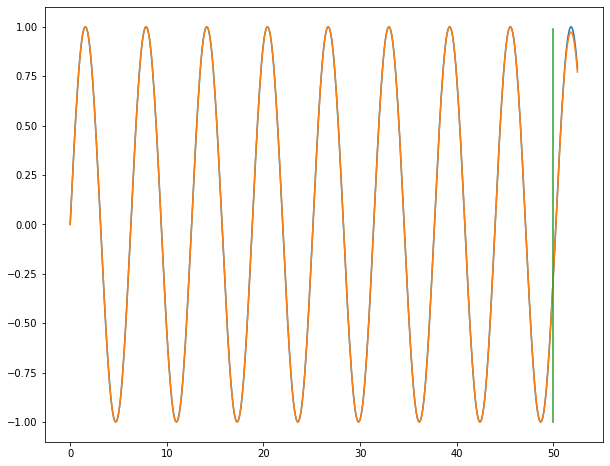

In [141]:
#Plotting
plt.subplots(figsize = (10,8))
plt.plot(actual_X, actual_Y)
plt.plot(actual_X, actual_plus_forecast)
plt.plot(flat_X, flat_Y)
plt.show()

In [142]:
#Post Green vertical Line: evrything is forecasted